In [1]:
#Apply the Features selections diiferent techniques and verify the accuracy using any appropriate 
#Machine learning model before to feature selection and after feature selection.
#Do the comparative analysis for different feature selection .Also demonstrate the use of one-hot encoding and log tensform method


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif,RFE,chi2
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [3]:
df=pd.read_excel("Telco_customer_churn.xlsx")



In [4]:
df.head(500)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6770-XUAGN,1,United States,California,North Hollywood,91605,"34.207295, -118.400022",34.207295,-118.400022,Female,...,Month-to-month,Yes,Electronic check,21.00,21,Yes,1,90,3753,Attitude of support person
496,4193-ORFCL,1,United States,California,North Hollywood,91606,"34.187599, -118.387125",34.187599,-118.387125,Female,...,Month-to-month,No,Mailed check,45.10,45.1,Yes,1,70,2740,Attitude of support person
497,7776-QWNFX,1,United States,California,Chino,91710,"33.990646, -117.663025",33.990646,-117.663025,Male,...,Month-to-month,Yes,Bank transfer (automatic),50.40,1527.5,Yes,1,83,4795,Attitude of support person
498,6689-TCZHQ,1,United States,California,Claremont,91711,"34.127621, -117.717863",34.127621,-117.717863,Female,...,Month-to-month,No,Electronic check,78.95,378.4,Yes,1,65,4054,Attitude of support person


<Axes: >

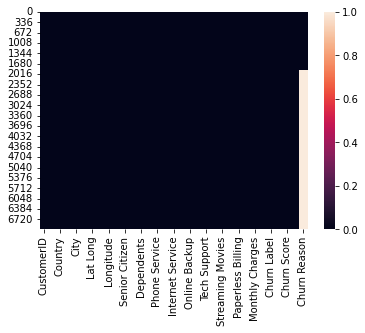

In [5]:
# Detect missing values
sns.heatmap(df.isnull())


In [6]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
drop_cols = [
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason'
]
df = df.drop(columns=drop_cols, errors='ignore')

In [8]:
df = df.dropna()

In [9]:
# ---------------------------
y = df['Churn Value']
X = df.drop('Churn Value', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [74]:
#df_encoded=pd.get_dummies(df,columns=["Gender","Contract","Paperless Billing"],drop_first=True)
cat_cols=["Gender","Contract","Paperless Billing"]
encoder=OneHotEncoder(sparse_output=False)
encoded=encoder.fit_transform(df[cat_cols])




In [104]:
#num_cols=['Monthly Charges','Total Charges','CLTV']
df['CLTV']=np.log10(df['CLTV'])
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,NaN
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,NaN
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,NaN
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,NaN
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,45,NaN
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,59,NaN
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,71,NaN
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,NaN


In [124]:
features=["Gender_Male","Contract_One year","Contract_Two year","Churn Score","Paperless Billing_Yes"]
X=df_encoded[features]
y=df_encoded['Churn Value']



In [125]:
# Step 5: Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
print(f"training set shape:{X_train.shape}")

training set shape:(5634, 5)


In [127]:
print(f"Testing set shape:{X_test.shape}")

Testing set shape:(1409, 5)


In [128]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [129]:
y_pred=model.predict(X_test)

In [130]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy (Before Feature Selection):{accuracy:.2f}")

Model Accuracy (Before Feature Selection):0.88


In [131]:
skb=SelectKBest(score_func=f_classif,k=2)
X_train_skb=skb.fit_transform(X_train,y_train)
X_test_skb=skb.transform(X_test)
model.fit(X_train_skb,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [132]:
y_pred_skb=model.predict(X_test_skb)

In [133]:
acc_skb=accuracy_score(y_test,y_pred_skb)
print(f"Model Accuracy (using ANOVA F-test Selection):{acc_skb:.2f}")

Model Accuracy (using ANOVA F-test Selection):0.85


In [134]:
rfe=RFE(model,n_features_to_select=2)
X_train_rfe=rfe.fit_transform(X_train,y_train)
X_test_rfe=rfe.transform(X_test)
model.fit(X_train_rfe,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [135]:
y_pred_rfe=model.predict(X_test_rfe)
acc_rfe=accuracy_score(y_test,y_pred_rfe)
print(f"Model Accuracy (using RFE Selection):{acc_rfe:.2f}")

Model Accuracy (using RFE Selection):0.72


In [136]:
sb=SelectKBest(score_func=chi2,k=2)
X_train_sb=sb.fit_transform(X_train,y_train)
X_test_sb=sb.transform(X_test)
model.fit(X_train_sb,y_train)
y_pred_sb=model.predict(X_test_sb)
acc_sb=accuracy_score(y_test,y_pred_sb)
print(f"Model Accuracy (using Chi2 Selection):{acc_sb:.4f}")



Model Accuracy (using Chi2 Selection):0.8524


In [137]:
print("\nComparative Accuracy Results:")
print(f"Model Accuracy (Before Feature Selection):{accuracy:.4f}")
print(f"Model Accuracy (using ANOVA F-test Selection):{acc_skb:.4f}")
print(f"Model Accuracy (using RFE Selection):{acc_rfe:.4f}")

print(f"Model Accuracy (using Chi2 Selection):{acc_sb:.4f}")




Comparative Accuracy Results:
Model Accuracy (Before Feature Selection):0.8808
Model Accuracy (using ANOVA F-test Selection):0.8524
Model Accuracy (using RFE Selection):0.7161
Model Accuracy (using Chi2 Selection):0.8524
